## Plot the Yearly Flux Cross-sections for Final Figure

In [1]:
import cmocean.cm as cm
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import scipy.interpolate as interp
import xarray as xr

In [2]:
plt.rcParams['font.size'] = 36

# get colormap
ncolors = 256
oldmaps = ['Purples', 'Blues', 'Greens', 'Oranges']
newmaps = ['Purples_alpha', 'Blues_alpha', 'Greens_alpha', 'Oranges_alpha']

for oldmap, newmap in zip(oldmaps, newmaps):
    color_array = plt.get_cmap(oldmap)(range(ncolors))

    # change alpha values
    color_array[:,-1] = np.linspace(0.0, 1.0, ncolors)

    # create a colormap object
    map_object = LinearSegmentedColormap.from_list(name=newmap, colors=color_array)

    # register this new colormap with matplotlib
    plt.register_cmap(cmap=map_object)

In [3]:
mymesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
depthf = interp.interp1d(mymesh.z, mymesh.gdepw_1d)
figrid = 386
igrid = figrid-1
fjgrid = 177
jgrid = fjgrid-1
tmask = mymesh.tmask[0]
fmask = mymesh.fmask[0, :, igrid]
fmask2 = mymesh.fmask[0, :, :, jgrid]
f_lons = mymesh.glamf[0, igrid]
f_lats = mymesh.gphif[0, :, jgrid]
u_lons = mymesh.glamv[0, igrid]    # note switch to v with the switch from t to f
v_lats = mymesh.gphiv[0, :, jgrid] 
w_depths = mymesh.gdepw_1d
xs, ys = np.meshgrid(np.array(mymesh.glamv[0, igrid]), np.array(mymesh.gdept_1d))

In [4]:
m2lon = ((u_lons[314]-u_lons[260])/(mymesh.e2f[0, igrid, 260:314].sum())).values
m2lat = ((v_lats[301]-v_lats[234])/(mymesh.e2f[0, 234:301, jgrid].sum())).values

In [5]:
def draw_patches(fmask, ll, ul, u_lons, w_depths):
    maxw = w_depths.shape[0] - 1
    topo = []
    for i in range(ll,ul):
        for j in range(maxw):
            if fmask[j, i] == 0:
                rect = Rectangle((u_lons[i], w_depths[j]), u_lons[i+1]-u_lons[i], w_depths[j+1]-w_depths[j])
                topo.append(rect)
    pc = PatchCollection(topo, facecolors='lightgray', edgecolors='lightgray')
    return(pc)

In [6]:
def draw_patches_vic(fmask, ll, ul, v_lats, w_depths, alpha=1):
    topo = []
    for i in range(ll, ul):
        for j in range(39):
            if fmask[j, i] == 0:
                rect = Rectangle((v_lats[i], w_depths[j]), v_lats[i+1]-v_lats[i], w_depths[j+1]-w_depths[j])
                topo.append(rect)
    pc = PatchCollection(topo, facecolors='lightgray', edgecolors='lightgray', alpha=alpha)
    return(pc)

In [7]:
def get_data_forward(month, year, section=2):
    amonth = glob.glob('/data/sallen/results/Ariane/FullNorth/*'+month+str(year)+'/ariane_positions_quantitative.nc')
    mydata = xr.open_dataset(amonth[0])
    lons = mydata.init_lon[(mydata.final_section==section)]
    depths = depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section==section)]
    sals = mydata.init_salt[(mydata.final_section==section)]
    mydata.close()
    for f in amonth[1:]:
        mydata = xr.open_dataset(f)
        lons = np.concatenate((lons, mydata.init_lon[(mydata.final_section==section)]))
        depths = np.concatenate((depths, depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]))
        transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))
        sals = np.concatenate((sals, mydata.init_salt[(mydata.final_section==section)]))
        mydata.close()
    return lons, depths, transports, sals

In [8]:
def get_data_forward_vic(month, year, section=2):
    amonth = glob.glob('/data/sallen/results/Ariane/FullSouth/*'+month+str(year)+'/ariane_positions_quantitative.nc')
    mydata = xr.open_dataset(amonth[0])
    lats = mydata.init_lat[(mydata.final_section==section)]
    depths = depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section==section)]
    sals = mydata.final_salt[(mydata.final_section==section)]
    mydata.close()
    for f in amonth[1:]:
        mydata = xr.open_dataset(f)
        lats = np.concatenate((lats, mydata.init_lat[(mydata.final_section==section)]))
        depths = np.concatenate((depths, depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]))
        transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))
        sals = np.concatenate((sals, mydata.final_salt[(mydata.final_section==section)]))
        mydata.close()
    return lats, depths, transports, sals

In [9]:
def get_data_backward_gi(month, year, section = 2):
    amonth = glob.glob('/data/sallen/results/Ariane/InGIslands/*'+month+str(year)+'/ariane_positions_quantitative.nc')
    mydata = xr.open_dataset(amonth[0])
    lons = mydata.init_lon[(mydata.final_section==section)]
    depths = depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section==section)]
    sals = mydata.init_salt[(mydata.final_section==section)]
    mydata.close()
    for f in amonth[1:]:
        mydata = xr.open_dataset(f)
        lons = np.concatenate((lons, mydata.init_lon[(mydata.final_section==section)]))
        depths = np.concatenate((depths, depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]))
        transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))
        sals = np.concatenate((sals, mydata.init_salt[(mydata.final_section==section)]))
        mydata.close()
    return lons, depths, transports, sals

In [10]:
def get_data_backward_gi_vic(month, year, section = 3):
    amonth = glob.glob('/data/sallen/results/Ariane/BackSouth/*'+month+str(year)+'/ariane_positions_quantitative.nc')
    mydata = xr.open_dataset(amonth[0])
    lats = mydata.init_lat[(mydata.final_section==section)]
    depths = depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section==section)]
    sals = mydata.final_salt[(mydata.final_section==section)]
    mydata.close()
    for f in amonth[1:]:
        mydata = xr.open_dataset(f)
        lats = np.concatenate((lats, mydata.init_lat[(mydata.final_section==section)]))
        depths = np.concatenate((depths, depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]))
        transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))
        sals = np.concatenate((sals, mydata.final_salt[(mydata.final_section==section)]))
        mydata.close()
    return lats, depths, transports, sals

In [11]:
def get_data_forward_gi(month, year, section = 2):
    amonth = glob.glob('/data/sallen/results/Ariane/SouthGIslands//*'+month+str(year)+'/ariane_positions_quantitative.nc')
    mydata = xr.open_dataset(amonth[0])
    lons = mydata.init_lon[(mydata.final_section==section)]
    depths = depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section==section)]
    sals = mydata.init_salt[(mydata.final_section==section)]
    mydata.close()
    for f in amonth[1:]:
        mydata = xr.open_dataset(f)
        lons = np.concatenate((lons, mydata.init_lon[(mydata.final_section==section)]))
        depths = np.concatenate((depths, depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]))
        transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))
        sals = np.concatenate((sals, mydata.init_salt[(mydata.final_section==section)]))
        mydata.close()
    return lons, depths, transports, sals

In [12]:
def get_data_forward_gi_vic(month, year, section = 3):
    amonth = glob.glob('/data/sallen/results/Ariane/FullSouth//*'+month+str(year)+'/ariane_positions_quantitative.nc')
    mydata = xr.open_dataset(amonth[0])
    lats = mydata.init_lat[(mydata.final_section==section)]
    depths = depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section==section)]
    sals = mydata.final_salt[(mydata.final_section==section)]
    mydata.close()
    for f in amonth[1:]:
        mydata = xr.open_dataset(f)
        lats = np.concatenate((lats, mydata.init_lat[(mydata.final_section==section)]))
        depths = np.concatenate((depths, depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]))
        transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))
        sals = np.concatenate((sals, mydata.final_salt[(mydata.final_section==section)]))
        mydata.close()
    return lats, depths, transports, sals

In [13]:
def get_data_backward(month, year, section=2):
    amonth = glob.glob('/data/sallen/results/Ariane/BackNorth/*'+month+str(year)+'/ariane_positions_quantitative.nc')
    mydata = xr.open_dataset(amonth[0])
    lons = mydata.init_lon[(mydata.final_section==section)]
    depths = depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section==section)]
    sals = mydata.init_salt[(mydata.final_section==section)]
    mydata.close()
    for f in amonth[1:]:
        mydata = xr.open_dataset(f)
        lons = np.concatenate((lons, mydata.init_lon[(mydata.final_section==section)]))
        depths = np.concatenate((depths, depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]))
        transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))
        sals = np.concatenate((sals, mydata.init_salt[(mydata.final_section==section)]))
        mydata.close()
    return lons, depths, transports, sals

In [14]:
def get_data_backward_vic(month, year, section=2):
    amonth = glob.glob('/data/sallen/results/Ariane/BackSouth/*'+month+str(year)+'/ariane_positions_quantitative.nc')
    mydata = xr.open_dataset(amonth[0])
    lats = mydata.init_lat[(mydata.final_section==section)]
    depths = depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section==section)]
    sals = mydata.final_salt[(mydata.final_section==section)]
    mydata.close()
    for f in amonth[1:]:
        mydata = xr.open_dataset(f)
        lats = np.concatenate((lats, mydata.init_lat[(mydata.final_section==section)]))
        depths = np.concatenate((depths, depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]))
        transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))
        sals = np.concatenate((sals, mydata.final_salt[(mydata.final_section==section)]))
        mydata.close()
    return lats, depths, transports, sals

In [15]:
month = {1:'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 
         8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}
lons, depths, transports, sals = np.array([]), np.array([]), np.array([]), np.array([])
months = 4*np.ones_like(lons)
years = 15*np.ones_like(lons)
for y in [15, 16, 17, 18]:
    print(y)
    for m in month:
        newlons, newdepths, newtransports, newsals = get_data_backward(month[m], y)
        newmonths = m*np.ones_like(newlons)
        newyears = y*np.ones_like(newlons)
        lons = np.concatenate((lons, newlons))
        depths = np.concatenate((depths, newdepths))
        transports = np.concatenate((transports, newtransports))
        sals = np.concatenate((sals, newsals))
        months = np.concatenate((months, newmonths))
        years = np.concatenate((years, newyears))
        
        newlons, newdepths, newtransports, newsals = get_data_backward_gi(month[m], y)
        newmonths = m*np.ones_like(newlons)
        newyears = y*np.ones_like(newlons)
        lons = np.concatenate((lons, newlons))
        depths = np.concatenate((depths, newdepths))
        transports = np.concatenate((transports, newtransports))
        sals = np.concatenate((sals, newsals))
        months = np.concatenate((months, newmonths))
        years = np.concatenate((years, newyears))

15
16
17
18


In [16]:
month = {1:'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 
         8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}
olons, odepths, otransports, osals = np.array([]), np.array([]), np.array([]), np.array([])
omonths = 4*np.ones_like(olons)
oyears = 15*np.ones_like(olons)
for y in [15, 16, 17, 18]:
    print(y)
    for m in month:
        newlons, newdepths, newtransports, newsals = get_data_forward(month[m], y)
        newmonths = m*np.ones_like(newlons)
        newyears = y*np.ones_like(newlons)
        olons = np.concatenate((olons, newlons))
        odepths = np.concatenate((odepths, newdepths))
        otransports = np.concatenate((otransports, newtransports))
        osals = np.concatenate((osals, newsals))
        omonths = np.concatenate((omonths, newmonths))
        oyears = np.concatenate((oyears, newyears))
        
        newlons, newdepths, newtransports, newsals = get_data_forward_gi(month[m], y)
        newmonths = m*np.ones_like(newlons)
        newyears = y*np.ones_like(newlons)
        olons = np.concatenate((olons, newlons))
        odepths = np.concatenate((odepths, newdepths))
        otransports = np.concatenate((otransports, newtransports))
        osals = np.concatenate((osals, newsals))
        omonths = np.concatenate((omonths, newmonths))
        oyears = np.concatenate((oyears, newyears))

15
16
17
18


oo 31870.904511511468 26740.307183473386 5130.597328038051
11.059173899088456
oo 25952.223241768603 19524.70486665357 6427.518375115036
2.643509514932847
3.4226393475352457
0.761932724039425
45212.61098342584


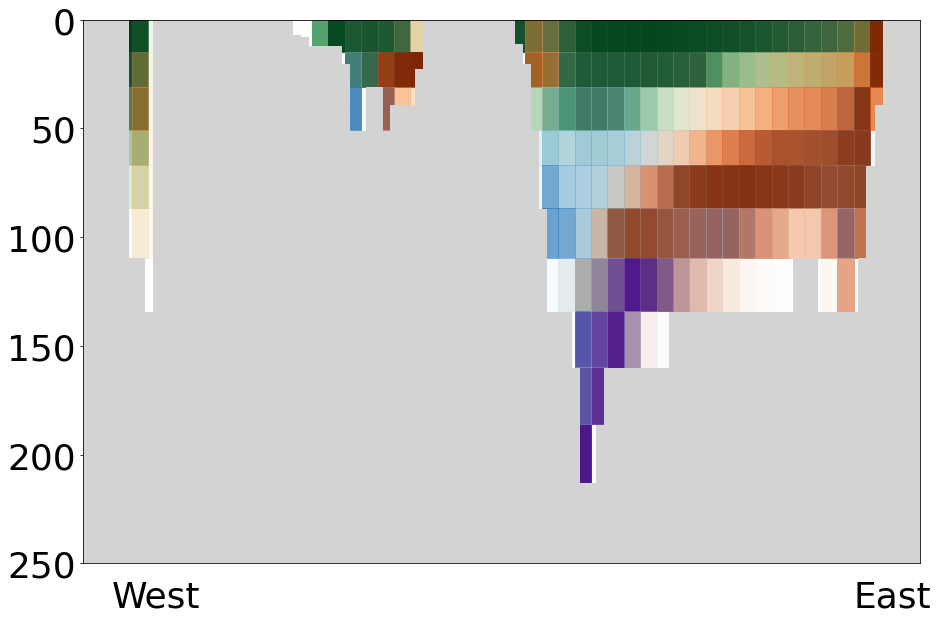

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
jmin = 210
gridding = 2
sisal = 30

v2max = 0.01 / otransports[osals <= sisal].sum() / m2lon * 24 * 365 * 4
print ('oo', otransports.sum()/ (24 * 365 * 4), otransports[osals < sisal].sum()/ (24 * 365 * 4), 
       otransports[osals >= sisal].sum()/ (24 * 365 * 4))
c, xedge, yedge, im2 = ax.hist2d(olons[osals < sisal], 
                                odepths[osals < sisal],
                                weights=otransports[osals < sisal],
                                bins=[np.array(f_lons[jmin:314:gridding]), new_ws], cmap='Greens_alpha', 
                                vmax=v2max, density=True,)

print (c.max()/v2max)

vmax = 0.01 / transports[sals < 31.2].sum() / m2lon * 24 * 365 * 4
print ('oo', transports.sum()/ (24 * 365 * 4), transports[sals < 31.2].sum()/ (24 * 365 * 4), 
       transports[sals >= 31.2].sum()/ (24 * 365 * 4))

c, xedge, yedge, im = ax.hist2d(lons[sals < 31.2], 
                                depths[sals < 31.2],
                                weights=transports[sals < 31.2],
                                bins=[np.array(f_lons[jmin:314:gridding]), new_ws], cmap='Oranges_alpha', 
                                    vmax=vmax, density=True)
print (c.max()/vmax)

vmax = 0.01 / transports[sals >= 31.2].sum() / m2lon * 24 * 365 * 4
c, xedge, yedge, im = ax.hist2d(lons[sals >= 31.2], 
                                depths[sals >= 31.2],
                                weights=transports[sals >= 31.2],
                                bins=[np.array(f_lons[jmin:314:gridding]), new_ws], cmap='Purples_alpha', 
                                    vmax=vmax, density=True,)

print (c.max()/vmax)

v2max = 0.01 / otransports[osals > sisal].sum() / m2lon * 24 * 365 * 4
c, xedge, yedge, im2 = ax.hist2d(olons[osals >= sisal], 
                                odepths[osals >= sisal],
                                weights=otransports[osals >= sisal],
                                bins=[np.array(f_lons[jmin:314:gridding]), new_ws], cmap='Blues_alpha', 
                                vmax=v2max, density=True)

print (c.max()/v2max)



ax.invert_yaxis()
ax.set_ylim(250, 0)
ax.set_xticks([])
ax.text(-123.57, 270, "West")
ax.text(-123.1, 270, "East")
pc = draw_patches(fmask, jmin, 314, np.array(u_lons), np.array(w_depths[0]))
ax.add_collection(pc);
print ((mymesh.e1f[0, igrid, jmin:314].sum()).values)
fig.savefig('oroberts_final.png')

In [21]:
month = {1:'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 
         8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}
lons, depths, transports, sals = np.array([]), np.array([]), np.array([]), np.array([])
months = 4*np.ones_like(lons)
years = 15*np.ones_like(lons)
for y in [15, 16, 17, 18]:
    print(y)
    for m in month:
        newlons, newdepths, newtransports, newsals = get_data_backward_vic(month[m], y)
        newmonths = m*np.ones_like(newlons)
        newyears = y*np.ones_like(newlons)
        lons = np.concatenate((lons, newlons))
        depths = np.concatenate((depths, newdepths))
        transports = np.concatenate((transports, newtransports))
        sals = np.concatenate((sals, newsals))
        months = np.concatenate((months, newmonths))
        years = np.concatenate((years, newyears))
        
        newlons, newdepths, newtransports, newsals = get_data_backward_gi_vic(month[m], y)
        newmonths = m*np.ones_like(newlons)
        newyears = y*np.ones_like(newlons)
        lons = np.concatenate((lons, newlons))
        depths = np.concatenate((depths, newdepths))
        transports = np.concatenate((transports, newtransports))
        sals = np.concatenate((sals, newsals))
        months = np.concatenate((months, newmonths))
        years = np.concatenate((years, newyears))

15
16
17
18


In [22]:
month = {1:'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 
         8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}
olons, odepths, otransports, osals = np.array([]), np.array([]), np.array([]), np.array([])
omonths = 4*np.ones_like(olons)
oyears = 15*np.ones_like(olons)
for y in [15, 16, 17, 18]:
    print(y)
    for m in month:
        newlons, newdepths, newtransports, newsals = get_data_forward_vic(month[m], y)
        newmonths = m*np.ones_like(newlons)
        newyears = y*np.ones_like(newlons)
        olons = np.concatenate((olons, newlons))
        odepths = np.concatenate((odepths, newdepths))
        otransports = np.concatenate((otransports, newtransports))
        osals = np.concatenate((osals, newsals))
        omonths = np.concatenate((omonths, newmonths))
        oyears = np.concatenate((oyears, newyears))
        
        newlons, newdepths, newtransports, newsals = get_data_forward_gi_vic(month[m], y)
        newmonths = m*np.ones_like(newlons)
        newyears = y*np.ones_like(newlons)
        olons = np.concatenate((olons, newlons))
        odepths = np.concatenate((odepths, newdepths))
        otransports = np.concatenate((otransports, newtransports))
        osals = np.concatenate((osals, newsals))
        omonths = np.concatenate((omonths, newmonths))
        oyears = np.concatenate((oyears, newyears))

15
16
17
18


oo 1112208465.1924486 935953646.5997791 176254818.5926676
5.446429832539066
oo 906491677.6605598 681792440.4049758 224699237.2555846
2.45928290351305
0.9165026140189085
0.8639584274433374
35823.448754892044


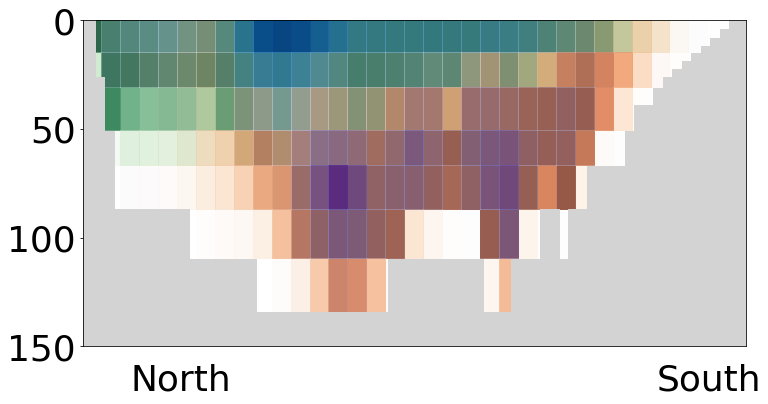

In [24]:
width_scale = 35.8/45.2
fig, ax = plt.subplots(1, 1, figsize=(15*width_scale, 10*150/250))
imin, imax = 234-2, 301+2
gridding = 2
sisal = 30
idsal = 31.2

vmax = 0.01 / transports[sals < sisal].sum() / m2lat * 24 * 365 * 4
print ('oo', transports.sum(), transports[sals < sisal].sum(), transports[sals >= sisal].sum())

c, xedge, yedge, im = ax.hist2d(lons[sals < sisal], 
                                depths[sals < sisal],
                                weights=transports[sals < sisal],
                                bins=[np.array(f_lats[imin:imax:gridding]), new_ws], cmap='Greens_alpha', 
                                    vmax=vmax, density=True)
print (c.max()/vmax)

v2max = 0.01 / otransports[osals <= idsal].sum() / m2lat * 24 * 365 * 4
print ('oo', otransports.sum(), otransports[osals < idsal].sum(), otransports[osals >= idsal].sum())
c, xedge, yedge, im2 = ax.hist2d(olons[osals < idsal], 
                                odepths[osals < idsal],
                                weights=otransports[osals < idsal],
                                bins=[np.array(f_lats[imin:imax:gridding]), new_ws], cmap='Oranges_alpha', 
                                vmax=v2max, density=True,)
print (c.max()/v2max)



vmax = 0.01 / transports[sals >= sisal].sum() / m2lat * 24 * 365 * 4
c, xedge, yedge, im = ax.hist2d(lons[sals >= sisal], 
                                depths[sals >= sisal],
                                weights=transports[sals >= sisal],
                                bins=[np.array(f_lats[imin:imax:gridding]), new_ws], cmap='Blues_alpha', 
                                    vmax=vmax, density=True,)

print (c.max()/vmax)

v2max = 0.01 / otransports[osals > idsal].sum() / m2lat * 24 * 365 * 4
c, xedge, yedge, im2 = ax.hist2d(olons[osals >= idsal], 
                                odepths[osals >= idsal],
                                weights=otransports[osals >= idsal],
                                bins=[np.array(f_lats[imin:imax:gridding]), new_ws], cmap='Purples_alpha', 
                                vmax=v2max, density=True)

print (c.max()/v2max)



ax.invert_yaxis()
ax.set_ylim(150, 0)
ax.invert_xaxis()
ax.text(48.37, 170, 'North')
ax.text(48.15, 170, 'South')
ax.set_xticks([])
pc = draw_patches_vic(fmask2, imin, imax, np.array(v_lats), np.array(w_depths[0]))
ax.add_collection(pc);

print ((mymesh.e2f[0, imin:imax, jgrid].sum()).values)
fig.savefig('victoria_final.png')

In [96]:
print (e3t[30:23:-1].values)

[26.59728865 26.28684983 25.70331479 24.64073198 22.81323256 19.95870258
 16.10792044]


In [99]:
(e3t[23]+e3t[22]).values

array(19.79981227)

In [105]:
(e3t[21:15:-1].sum()).values

array(14.79823468)

In [108]:
(e3t[:15].sum()).values

array(15.09450132)

In [109]:
def sumthemup(array):
    newarray = np.empty((10))
    newarray[0] = array[0:15].sum()
    newarray[1] = array[15:21].sum()
    newarray[2] = array[22] + array[23]
    newarray[3:10] = array[24:31]
    return newarray

In [18]:
new_ws = np.empty((11))
new_ws[0] = w_depths[0, 0]
new_ws[1] = w_depths[0, 15]
new_ws[2] = w_depths[0, 22]
new_ws[3:] = w_depths[0, 24:32]
new_ws

array([  0.        ,  15.09625559,  31.10103509,  50.96323669,
        67.05207424,  86.96747037, 109.73706598, 134.34593444,
       160.02956159, 186.30527815, 212.89655735])